In [6]:
import numpy as np
import pandas as pd
from plotnine import *

df = pd.concat([pd.read_csv("pond-measurements.csv"),
                          pd.read_csv("container-measurements.csv"),
                          pd.read_csv("vm-measurements.csv")])

machine_cats = ["HUJI-pond", "pond-container", "HUJI-pond-vm"]
df["Machine"] = pd.Categorical(df["Machine"], machine_cats, ordered=True)
df["Machine"].cat.rename_categories(["Normal(HUJI-pond)", "Container(HUJI-pond)", "VM(HUJI-pond)"], inplace=True)

measurement_cats = [ "Instruction", "FunctionCall", "SysCall"]
df["MeasurementType"] = pd.Categorical(df["MeasurementType"], measurement_cats, ordered=True)
df["MeasurementType"].cat.rename_categories(["Add Instruction", "Functional Call", "System Call"], inplace=True)
df



,Machine,Host,MeasurementType,Iterations,TimeNs
0,Normal(HUJI-pond),pond,Add Instruction,10,0.000000
1,Normal(HUJI-pond),pond,Functional Call,10,0.000000
2,Normal(HUJI-pond),pond,System Call,10,500.000000
3,Normal(HUJI-pond),pond,Add Instruction,1000,0.250000
4,Normal(HUJI-pond),pond,Functional Call,1000,1.000000
5,Normal(HUJI-pond),pond,System Call,1000,568.000000
6,Normal(HUJI-pond),pond,Add Instruction,1000000,0.170750
7,Normal(HUJI-pond),pond,Functional Call,1000000,1.871000
8,Normal(HUJI-pond),pond,System Call,1000000,429.504000
9,Normal(HUJI-pond),pond,Add Instruction,1000000,0.153250


/home/nmdanny/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/home/nmdanny/anaconda3/lib/python3.7/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: new-plot.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


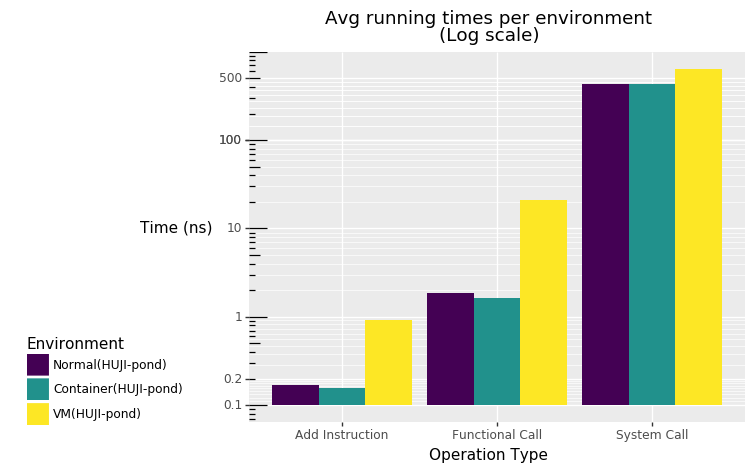

<ggplot: (8729188407713)>

In [15]:
df = df[(df["Iterations"] == 1000000)]
df["Time10Ns"] = df["TimeNs"]*10


def breaks_to_labels(breaks):
    return [round(brk/10,1) if brk/10 < 1 else int(round(brk/10)) for brk in breaks]

plot = (ggplot(df, aes("MeasurementType", "Time10Ns", fill="Machine"))
    + geom_col(stat = "identity", position=position_dodge())
    + ggtitle("Avg running times per environment\n(Log scale)")
    #+ scale_y_continuous(trans="log10")
    + scale_y_log10(breaks=(1, 2, 10, 100, 1000, 5000, 1000),
                    labels=breaks_to_labels )
    + theme(axis_title_y = element_text(angle = 0, hjust = 1),
            legend_position = (-0.1,0.2))
    + annotation_logticks(sides="l")
    + labs(x="Operation Type", y="Time (ns)", fill="Environment")
)
plot.save(filename="new-plot.png")
plot